In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [15]:
img = cv2.imread("image.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_array = np.array(img_rgb)
reshaped_img_array = np.reshape(img_array, (img_array.shape[0] * img_array.shape[1], 3))

img_float32 = np.float32(reshaped_img_array)

x = img_float32.copy()

In [16]:
print(x)

[[244. 245. 247.]
 [244. 245. 247.]
 [244. 245. 247.]
 ...
 [ 34.  25.  28.]
 [ 34.  25.  28.]
 [ 34.  25.  28.]]


In [17]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

c:\Users\j\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\j\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\j\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\j\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

1 : 126.27812398970173
2 : 57.42486938180407
3 : 39.744939914309576
4 : 27.774828475984172
5 : 22.9273942705327
6 : 19.477882358099734
7 : 17.608934390757685
8 : 15.347941544218946
9 : 13.972279919019432


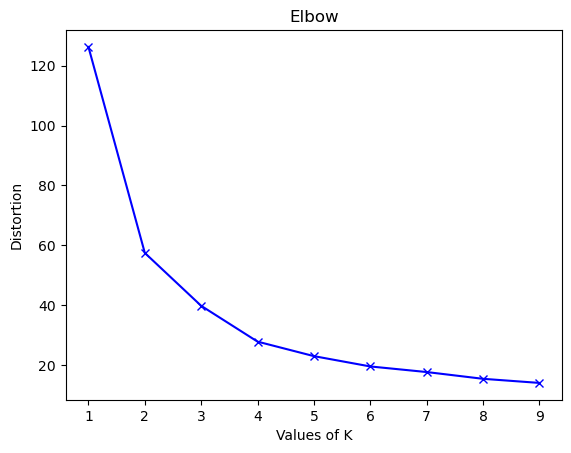

In [18]:
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(x)
    kmeanmodel.fit(x)

    distortions.append(sum(np.min(cdist(x, kmeanmodel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
    inertias.append(kmeanmodel.inertia_)
    mapping1[k] = sum(np.min(cdist(x, kmeanmodel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0]
    mapping2[k] = kmeanmodel.inertia_

for key, val in mapping1.items():
    print(f'{key} : {val}')


plt.plot (K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Elbow')
plt.show()

In [19]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [35]:
k = 4

_, labels, (centers) = cv2.kmeans(x, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [36]:
centers = np.uint8(centers)

labels = labels.flatten()

In [37]:
segmented_image = centers[labels.flatten()]  #convert all pixels to the color of the centroids

In [38]:
segmented_image = segmented_image.reshape(img_rgb.shape)

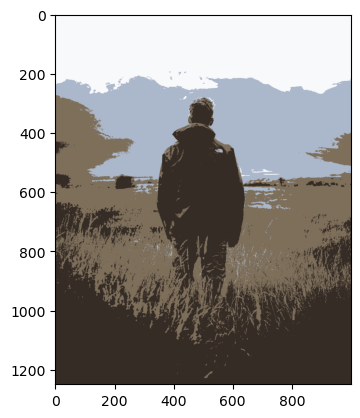

In [39]:
plt.imshow(segmented_image)
plt.show()

In [13]:
img_rgb.shape

(1000, 800, 3)